In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

Data Exploration

In [4]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

reshape rom 2d to 1d array -1 shows no change in dimention

In [6]:
y_train=y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
def plot_img(X,y,index):
      plt.figure(figsize= (10,1.5))
      plt.imshow(X[index])
      plt.xlabel(classes[y[index]])

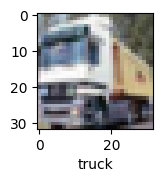

In [9]:
plot_img(X_train, y_train, 1)

Normalization

In [10]:
X_train=X_train/255
X_test=X_test/255

X_train[:2]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

sparse categorical for integer categories and categorical for one hot encoded data

In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 165s 103ms/step - loss: 1.8141 - accuracy: 0.3527
Epoch 2/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.6242 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.5436 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4817 - accuracy: 0.4802
Epoch 5/5
1563/1563 [==============================] - 146s 93ms/step - loss: 1.4304 - accuracy: 0.4988


In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 22ms/step - loss: 1.5191 - accuracy: 0.4661


[1.519149661064148, 0.4661000072956085]

In [14]:
from sklearn.metrics import classification_report

y_pred_values = model.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred_values]

print(classification_report(y_test, y_pred_class))

313/313 [==============================] - 13s 28ms/step
              precision    recall  f1-score   support

           0       0.70      0.35      0.47      1000
           1       0.57      0.65      0.61      1000
           2       0.42      0.30      0.35      1000
           3       0.42      0.21      0.28      1000
           4       0.42      0.43      0.42      1000
           5       0.44      0.31      0.37      1000
           6       0.61      0.39      0.47      1000
           7       0.31      0.75      0.44      1000
           8       0.55      0.67      0.60      1000
           9       0.51      0.59      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



## CNN implementation to improve accuracy

In [17]:
cnn = keras.models.Sequential([
 
    #cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32, 3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #dense network
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
    
    


No input shape needed in flatten layer

 softmax activation function: normalize probability (tries to reduce difference btwn two class prediction values) (sum always 1)
 
 A: 0.45 
 B: 0.67

 0.45/ 0.45+0.67 = 0.40

 0.67/ 9.45+0.67 = 0.59

In [18]:
cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 95s 59ms/step - loss: 1.9995 - accuracy: 0.2753
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6139 - accuracy: 0.4220
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4423 - accuracy: 0.4824
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3450 - accuracy: 0.5180
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2711 - accuracy: 0.5521


In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 18ms/step - loss: 1.2528 - accuracy: 0.5540


[1.2527681589126587, 0.5540000200271606]

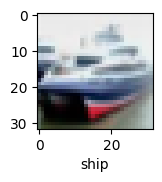

In [23]:
y_test = y_test.reshape(-1,)
plot_img(X_test, y_test, 1)

np.argmax returns index of max value element in array (0 1 2 3 4 5 6 7 8 9) classes mese whose prediction is highest

In [25]:
y_pred_values = cnn.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred_values]

print(classification_report(y_test, y_pred_class))

313/313 [==============================] - 5s 13ms/step
              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1000
           1       0.71      0.64      0.68      1000
           2       0.42      0.37      0.40      1000
           3       0.44      0.27      0.33      1000
           4       0.41      0.58      0.48      1000
           5       0.49      0.50      0.50      1000
           6       0.54      0.75      0.63      1000
           7       0.64      0.59      0.61      1000
           8       0.71      0.59      0.65      1000
           9       0.60      0.63      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000

